# DATA READING AND CLEANING

## 1. orders table

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_orders = pd.read_excel("Retail_dataset.xlsx",sheet_name = "orders")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [6]:
df_orders.shape

(99441, 7)

In [7]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [9]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [10]:
df_orders_delivered = df_orders[df_orders.order_status == "delivered"]

In [11]:
df_orders_delivered.shape

(96478, 7)

In [12]:
df_orders_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_timestamp      96470 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


In [13]:
df_orders_delivered.order_delivered_timestamp.isnull().sum()

8

In [14]:
df_orders_delivered_not_null = df_orders_delivered[~df_orders_delivered.order_delivered_timestamp.isnull()]

In [15]:
df_orders_delivered_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_timestamp      96470 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


In [16]:
df_orders_delivered_not_null[df_orders_delivered_not_null.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,8a9a08c7ca8900a200d83cf838a07e0b,delivered,2017-02-18 14:40:00,NaT,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,91efb7fcabc17925099dced52435837f,delivered,2017-02-18 12:45:31,NaT,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,e1f01a1bd6485e58ad3c769a5427d8a8,delivered,2017-02-18 13:29:47,NaT,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,7e1a5ca61b572d76b64b6688b9f96473,delivered,2017-02-18 16:48:35,NaT,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,c8822fce1d0bfa7ddf0da24fff947172,delivered,2017-02-17 13:05:55,NaT,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,6ff8b0d7b35d5c945633b8d60165691b,delivered,2017-01-19 12:48:08,NaT,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,2e0a2166aa23da2472c6a60c4af6f7a6,delivered,2017-02-19 01:28:47,NaT,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,c4c0011e639bdbcf26059ddc38bd3c18,delivered,2017-02-18 11:04:19,NaT,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d49f3dae6bad25d05160fc17aca5942d,delivered,2017-01-19 22:26:59,NaT,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,5a4fa4919cbf2b049e72be460a380e5b,delivered,2017-02-17 17:21:55,NaT,2017-03-03 12:16:03,2017-03-20


In [17]:
df_orders_delivered_not_null.order_approved_at.isnull().sum()

14

In [18]:
df_orders_delivered_not_null = df_orders_delivered_not_null[~df_orders_delivered_not_null.order_approved_at.isnull()]

In [19]:
df_orders_delivered_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96456 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96456 non-null  object        
 1   customer_id                    96456 non-null  object        
 2   order_status                   96456 non-null  object        
 3   order_purchase_timestamp       96456 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_timestamp      96456 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96456 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


## 2. order_items table

In [20]:
df_orderItems = pd.read_excel("Retail_dataset.xlsx",sheet_name = "order_items")
df_orderItems

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [21]:
df_orderItems.shape

(112650, 6)

In [22]:
df_orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


## 3. products

In [23]:
df_products = pd.read_excel("Retail_dataset.xlsx",sheet_name = "products")
df_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,toys,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,toys,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,toys,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,toys,700.0,31.0,13.0,20.0


In [24]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [25]:
df_products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

__Found missing values in__
- product_category_name    170
- product_weight_g           2
- product_length_cm          2
- product_height_cm          2
- product_width_cm           2

In [26]:
df_products.product_category_name.value_counts(normalize=True)

toys                                 0.754248
bed_bath_table                       0.024069
sports_leisure                       0.021994
furniture_decor                      0.020957
health_beauty                        0.019768
                                       ...   
fashion_childrens_clothes            0.000031
diapers_and_hygiene                  0.000031
home_comfort_2                       0.000031
security_and_services                0.000031
furniture_mattress_and_upholstery    0.000031
Name: product_category_name, Length: 70, dtype: float64

__Since 75% are toys so replace with the mode__

In [27]:
df_products.product_category_name.mode()[0]

'toys'

In [28]:
df_products[df_products.product_category_name.isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
8149,17823ffd2de8234f0e885a71109613a4,NaN,3750.0,42.0,20.0,24.0
8203,c230b471b7e21ff9060e68ee154afd70,NaN,200.0,16.0,5.0,11.0
8230,fe34503c6bccf918db601aaafd4a975a,NaN,3000.0,16.0,21.0,19.0
8291,0c877471e35049402bca235e06cb8063,NaN,10750.0,34.0,20.0,30.0


In [29]:
df_products.product_category_name.fillna(df_products.product_category_name.mode()[0],inplace = True)

In [30]:
df_products[df_products.product_category_name.isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [31]:
df_products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [32]:
df_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,toys,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,toys,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,toys,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,toys,700.0,31.0,13.0,20.0


In [33]:
df_products[df_products.product_weight_g.isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,toys,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,toys,NaN,NaN,NaN,NaN


In [34]:
df_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,toys,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,toys,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,toys,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,toys,700.0,31.0,13.0,20.0


In [35]:
df_products = df_products[~df_products.product_weight_g.isnull()]

In [36]:
df_products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [37]:
df_products.shape

(32949, 6)

In [38]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32949 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32949 non-null  object 
 1   product_category_name  32949 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


## 4. customers

In [39]:
df_customers = pd.read_excel("Retail_dataset.xlsx",sheet_name = "customers")
df_customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [40]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


## 5. payments

In [41]:
df_payments = pd.read_excel("Retail_dataset.xlsx",sheet_name = "payments")
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,wallet,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [42]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
(df_orders_delivered_not_null.isnull().sum()/df_orders_delivered_not_null.shape[0])*100

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_timestamp        0.0
order_estimated_delivery_date    0.0
dtype: float64

In [44]:
df_orders_delivered_not_null[df_orders_delivered_not_null.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [45]:
df_orders_delivered_not_null.shape[0]

96456

# DATA ANALYSIS AND VISUALIZATION

## 1. orders

In [46]:
df_orders_delivered_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96456 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96456 non-null  object        
 1   customer_id                    96456 non-null  object        
 2   order_status                   96456 non-null  object        
 3   order_purchase_timestamp       96456 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_timestamp      96456 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96456 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


## 2. order_items

In [47]:
df_orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [48]:
df_orderItems.describe()[["price","shipping_charges"]]

,price,shipping_charges
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


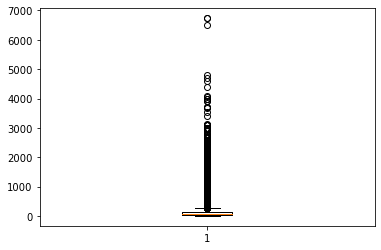

In [49]:
#inspecting price to check the outlier in the price varibale
plt.boxplot(df_orderItems["price"])
plt.show()

In [50]:
df_orderItems[df_orderItems.price == 6735.0]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.0,194.31


In [51]:
#print the quartile range for price
 
df_orderItems["price"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,.95,.96,.97,.98,.99,1])

0.10      23.80
0.20      34.90
0.30      47.49
0.40      59.00
0.50      74.99
0.60      95.00
0.70     119.90
0.80     150.00
0.90     229.80
0.95     349.90
0.96     399.00
0.97     499.00
0.98     619.00
0.99     890.00
1.00    6735.00
Name: price, dtype: float64

In [52]:
df_orderItems[df_orderItems.price > 5000]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.0,194.31
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6499.0,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.0,193.21


In [116]:
#df_orderItems[df_orderItems.price]

In [55]:
df_orderItems_below_99= df_orderItems[df_orderItems['price'].le(df_orderItems['price'].quantile(0.99))]

In [56]:
df_orderItems_below_99.price.describe()

count    111533.000000
mean        107.515762
std         112.758539
min           0.850000
25%          39.900000
50%          73.500000
75%         129.990000
max         890.000000
Name: price, dtype: float64

In [57]:
df_orderItems_below_99.price.min()

0.85

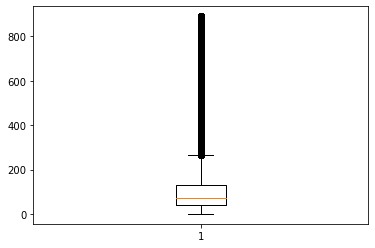

In [58]:
plt.boxplot(df_orderItems_below_99["price"])
plt.show()

In [59]:
df_orderItems_below_99.describe()["shipping_charges"]

count    111533.000000
mean         19.598914
std          14.454450
min           0.000000
25%          13.020000
50%          16.190000
75%          20.990000
max         312.410000
Name: shipping_charges, dtype: float64

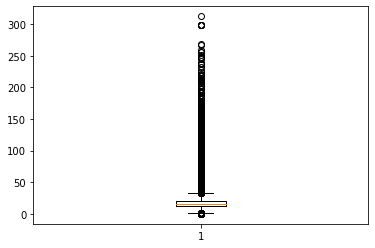

In [60]:
plt.boxplot(df_orderItems_below_99["shipping_charges"])
plt.show()

In [61]:
#print the quartile range for shipping_charges
 
df_orderItems_below_99["shipping_charges"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,.95,.96,.97,.98,.99,1])

0.10      8.7200
0.20     12.0400
0.30     13.9300
0.40     15.1000
0.50     16.1900
0.60     17.7700
0.70     19.3200
0.80     23.0800
0.90     32.7900
0.95     43.9900
0.96     48.2600
0.97     53.9404
0.98     62.3136
0.99     78.8300
1.00    312.4100
Name: shipping_charges, dtype: float64

In [62]:
df_orderItems_outlier_checked = df_orderItems_below_99[df_orderItems_below_99['shipping_charges'].le(df_orderItems_below_99['shipping_charges'].quantile(0.99))]

In [63]:
df_orderItems_outlier_checked.describe()

,order_item_id,price,shipping_charges
count,110418.000000,110418.000000,110418.000000
mean,1.199361,105.273089,18.676673
std,0.707286,109.066651,10.584136
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,12.960000
50%,1.000000,71.600000,16.140000
75%,1.000000,129.900000,20.680000
max,21.000000,890.000000,78.830000


In [64]:
df_orderItems_outlier_checked.shape

(110418, 6)

## 3. products

In [65]:
df_products.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32949 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32949 non-null  object 
 1   product_category_name  32949 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [66]:
df_products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [67]:
df_products_outlier = df_products[df_products.product_weight_g<30000]

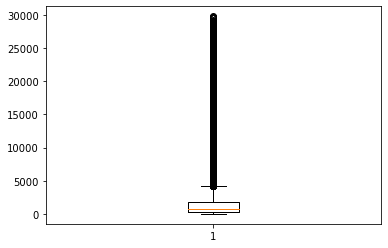

In [68]:
plt.boxplot(df_products_outlier.product_weight_g)
plt.show()

In [69]:
df_products_outlier.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32805.000000,32805.000000,32805.000000,32805.000000
mean,2154.460204,30.676391,16.742326,23.068130
std,3873.837867,16.773152,13.279819,11.910035
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1850.000000,38.000000,20.000000,30.000000
max,29800.000000,105.000000,105.000000,118.000000


## 4. customers

In [70]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


## 5. payments

In [71]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


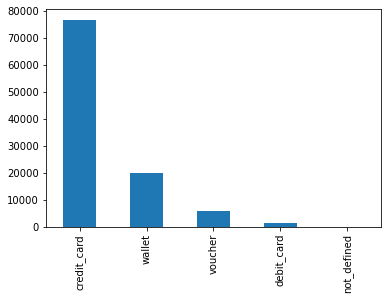

In [72]:
df_payments.payment_type.value_counts().plot.bar()
plt.show()

In [73]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [74]:
df_payments[["payment_sequential","payment_installments","payment_value"]].quantile(0.99)

payment_sequential         3.0000
payment_installments      10.0000
payment_value           1039.9165
Name: 0.99, dtype: float64

In [75]:
#outlier in "payment_sequential","payment_installments","payment_value"

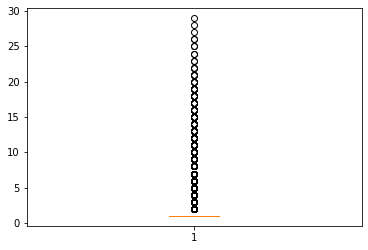

In [76]:
plt.boxplot(df_payments[["payment_sequential"]])
plt.show()

In [77]:
df_payments_outlier_1 = df_payments[df_payments['payment_sequential'].le(df_payments['payment_sequential'].quantile(0.99))]

In [78]:
df_payments_outlier_1.describe()

,payment_sequential,payment_installments,payment_value
count,102980.000000,102980.000000,102980.000000
mean,1.040794,2.869654,155.276802
std,0.224531,2.693191,218.059710
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,57.680000
50%,1.000000,1.000000,100.700000
75%,1.000000,4.000000,172.840000
max,3.000000,24.000000,13664.080000


In [79]:
df_payments_outlier_2 = df_payments_outlier_1[df_payments_outlier_1['payment_installments'].le(df_payments_outlier_1['payment_installments'].quantile(0.99))]

In [80]:
df_payments_outlier_2.describe()

,payment_sequential,payment_installments,payment_value
count,102639.000000,102639.000000,102639.000000
mean,1.040930,2.830873,154.602144
std,0.224892,2.604733,217.144573
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,57.600000
50%,1.000000,1.000000,100.330000
75%,1.000000,4.000000,172.170000
max,3.000000,10.000000,13664.080000


In [81]:
df_payments_outlier_final = df_payments_outlier_2[df_payments_outlier_2['payment_value'].le(df_payments_outlier_2['payment_value'].quantile(0.99))]

In [82]:
df_payments_outlier_final.describe()

,payment_sequential,payment_installments,payment_value
count,101612.000000,101612.000000,101612.000000
mean,1.041304,2.795182,139.481305
std,0.225908,2.566192,135.582158
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,57.280000
50%,1.000000,1.000000,99.800000
75%,1.000000,4.000000,168.802500
max,3.000000,10.000000,1034.600000


In [83]:
df_payments_outlier_final

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,wallet,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Final Dataframes : 


In [84]:
#1 orders
df_orders_delivered_not_null.shape

(96456, 7)

In [85]:
#2 order_items
df_orderItems_outlier_checked

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [86]:
#3 products
df_products_outlier


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,toys,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,toys,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,toys,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,toys,700.0,31.0,13.0,20.0


In [87]:
#4 customers
df_customers


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [88]:
#5 payments
df_payments_outlier_final

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,wallet,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [89]:
df_orders_delivered_not_null.shape

(96456, 7)

In [90]:
df_orderItems_outlier_checked.shape

(110418, 6)

In [91]:
df_products_outlier.shape

(32805, 6)

In [92]:
df_customers.shape

(99441, 4)

In [93]:
df_payments_outlier_final.shape

(101612, 5)

In [94]:
with pd.ExcelWriter('Retail_dataset_cleaned.xlsx') as writer:
    df_orders_delivered_not_null.to_excel(writer, sheet_name='orders',index= False)
    df_orderItems_outlier_checked.to_excel(writer, sheet_name='order_items',index= False)
    df_products_outlier.to_excel(writer, sheet_name='products',index= False)
    df_customers.to_excel(writer, sheet_name='customers',index= False)
    df_payments_outlier_final.to_excel(writer, sheet_name='payments',index= False)


In [95]:
df_products_outlier

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,toys,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,toys,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,toys,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,toys,700.0,31.0,13.0,20.0


In [96]:
df_orderItems_outlier_checked

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [97]:
df_with_prd_name = pd.merge (df_orderItems_outlier_checked,df_products_outlier,on="product_id",how="inner")

In [98]:
df_with_prd_name.shape

(110321, 11)

In [99]:
df_with_prd_name["Total_Price"] = df_with_prd_name["price"]+df_with_prd_name["shipping_charges"]

In [100]:
df_with_prd_name.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19


In [101]:
df_with_prd_name["Total_Revenue"] = df_with_prd_name["Total_Price"]*df_with_prd_name["order_item_id"]

In [102]:
df_with_prd_name.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,73.86,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,83.23,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,75.07,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19


In [103]:
df_with_prd_name[df_with_prd_name.product_category_name == "toys"]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,73.86,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,83.23,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,75.07,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110313,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,19.0,15.79,toys,150.0,16.0,9.0,14.0,34.79,69.58
110315,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,146.9,15.20,toys,350.0,18.0,15.0,16.0,162.10,162.10
110316,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,toys,6700.0,35.0,12.0,22.0,181.10,181.10
110317,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,toys,2300.0,37.0,30.0,20.0,112.52,112.52


In [104]:
df_with_prd_name.groupby(by="product_category_name").sum()

,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
product_category_name,,,,,,,,,
agro_industry_and_commerce,70,11783.15,1435.40,184969.0,1723.0,1257.0,1187.0,13218.55,13610.37
air_conditioning,123,16513.31,2296.09,448658.0,3774.0,1862.0,2387.0,18809.40,26018.09
art,16,1571.88,330.54,44250.0,633.0,184.0,400.0,1902.42,1902.42
arts_and_craftmanship,5,379.80,121.17,9950.0,197.0,48.0,156.0,500.97,500.97
audio,137,4662.78,1802.59,38310.0,2897.0,907.0,2119.0,6465.37,7076.41
...,...,...,...,...,...,...,...,...,...
stationery,680,55447.11,10875.61,1132526.0,18716.0,13024.0,15157.0,66322.72,70152.37
tablets_printing_image,76,6631.15,1026.46,21539.0,1718.0,652.0,1677.0,7657.61,8166.05
telephony,1496,69689.51,17935.18,345261.0,21552.0,7463.0,16416.0,87624.69,102162.04


In [105]:
df_with_prd_name_toys = df_with_prd_name[df_with_prd_name.product_category_name=="toys"]

In [106]:
df_with_prd_name_toys.shape

(83101, 13)

In [107]:
df_with_prd_name_toys.Total_Revenue.sum()

11900769.440000001

In [108]:
df_with_prd_name_toys

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,73.86,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,83.23,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,75.07,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110313,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,19.0,15.79,toys,150.0,16.0,9.0,14.0,34.79,69.58
110315,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,146.9,15.20,toys,350.0,18.0,15.0,16.0,162.10,162.10
110316,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,toys,6700.0,35.0,12.0,22.0,181.10,181.10
110317,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,toys,2300.0,37.0,30.0,20.0,112.52,112.52


In [109]:
df_with_prd_name.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,73.86,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,83.23,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,75.07,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,72.19,72.19


In [110]:
# Highest selling product

df = df_with_prd_name.groupby(by="product_id").sum()

In [111]:
df[df.Total_Revenue == 74523.0]

,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
product_id,,,,,,,,,
bb50f2e236e5eea0100680137654686c,215,63885.0,3721.1,78000.0,6630.0,780.0,4290.0,67606.1,74523.0


In [112]:
df.head()

,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
product_id,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,1,101.65,18.59,300.0,20.0,16.0,16.0,120.24,120.24
00088930e925c41fd95ebfe695fd2655,1,129.90,13.93,1225.0,55.0,10.0,26.0,143.83,143.83
0009406fd7479715e4bef61dd91f2462,1,229.00,13.10,300.0,45.0,15.0,35.0,242.10,242.10
000b8f95fcb9e0096488278317764d19,2,117.80,39.20,1100.0,38.0,48.0,24.0,157.00,157.00
000d9be29b5207b54e86aa1b1ac54872,1,199.00,19.27,250.0,22.0,11.0,15.0,218.27,218.27


In [113]:
df.sort_values(by="Total_Revenue",inplace = True,ascending=False)

In [114]:
df.head()

,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
product_id,,,,,,,,,
bb50f2e236e5eea0100680137654686c,215,63885.00,3721.10,78000.0,6630.0,780.0,4290.0,67606.10,74523.00
d1c427060a0f73f6b889a5c7c61f2ac4,357,45869.57,12766.80,2174600.0,6640.0,6640.0,6640.0,58636.37,63301.80
6cdd53843498f92890544667809f1595,164,54730.20,4363.79,140400.0,3900.0,1872.0,5928.0,59093.99,62194.65
99a4788cb24856965c36a24e339b6058,542,43025.56,8046.04,674904.0,24400.0,4880.0,19520.0,51071.60,56627.43
422879e10f46682990de24d770e7f83d,792,26527.31,7540.77,748650.0,14490.0,10626.0,14490.0,34068.08,56349.65


In [115]:
df_with_prd_name[df_with_prd_name.product_id == "bb50f2e236e5eea0100680137654686c"]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Total_Price,Total_Revenue
17309,01f67ca8027e959060afd840aa06f465,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,330.0,14.70,toys,400.0,34.0,4.0,22.0,344.70,344.70
17310,0256530d814cde05587fcd8e1b992bc8,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,325.0,18.71,toys,400.0,34.0,4.0,22.0,343.71,343.71
17311,0756f4ba0fd88d3e50c7ae0d66edfb4c,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,325.0,17.02,toys,400.0,34.0,4.0,22.0,342.02,342.02
17312,09c06d47b8b58dbabf753646fe5b89ab,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,330.0,19.53,toys,400.0,34.0,4.0,22.0,349.53,349.53
17313,09c0caffae8336db750e232298e4a574,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,330.0,39.22,toys,400.0,34.0,4.0,22.0,369.22,369.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17499,f809dbd06c5d2816ae17cae070339ed6,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,330.0,25.03,toys,400.0,34.0,4.0,22.0,355.03,355.03
17500,f85ae34425864282006a444408820201,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,330.0,12.25,toys,400.0,34.0,4.0,22.0,342.25,342.25
17501,fa8bc976c444fee300429c2465aa1842,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,325.0,10.47,toys,400.0,34.0,4.0,22.0,335.47,335.47
17502,fb75871974a19244a87fcafde416f747,1,bb50f2e236e5eea0100680137654686c,f7ba60f8c3f99e7ee4042fdef03b70c4,330.0,36.27,toys,400.0,34.0,4.0,22.0,366.27,366.27
